In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import load_diabetes

In [7]:
diabetes = load_diabetes()

In [9]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
df = pd.DataFrame(diabetes.data, columns = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [11]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
X = df
y = diabetes['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [14]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

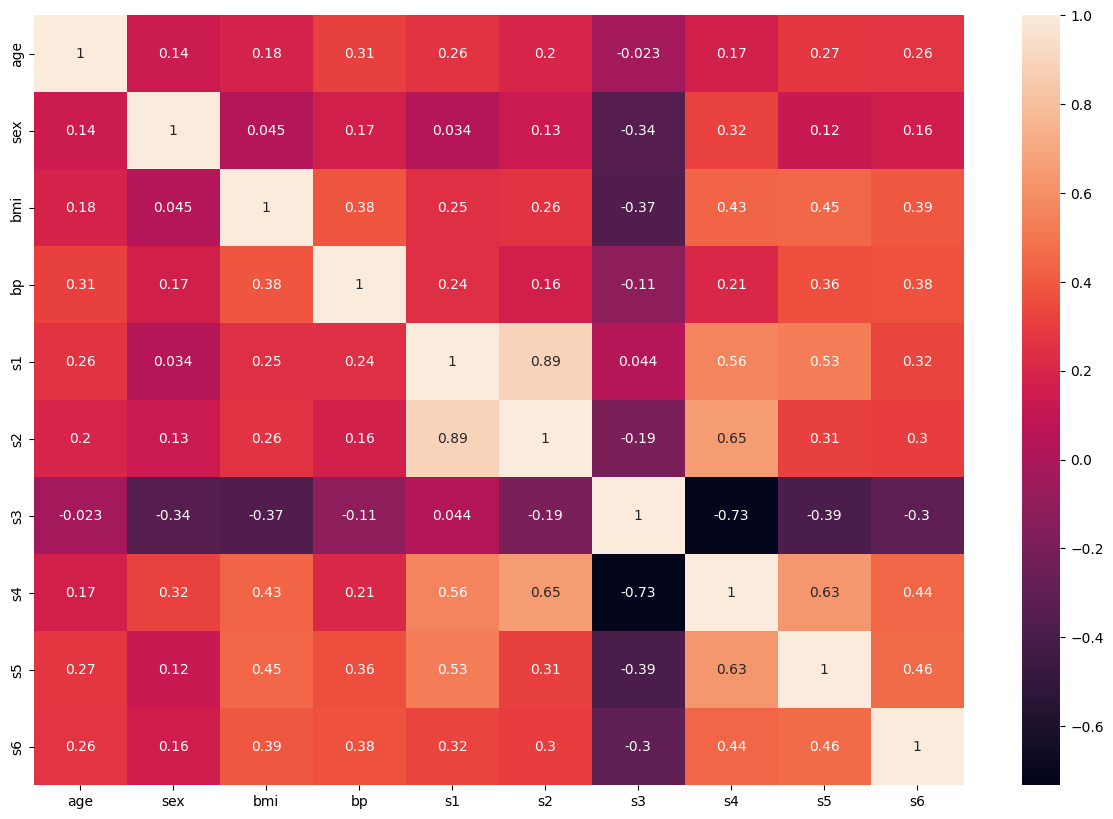

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), annot = True)

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
param = {
    'criterion' : ['squared_error','friedaman_mse','absolute_error'],
    'splitter': ['best','random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto','sqrt','log']
}

In [25]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = dtr, param_grid = param,scoring = 'neg_mean_squared_error',cv = 5)

In [26]:
grid.fit(X_train,y_train)

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedaman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [27]:
y_pred_grid = grid.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 Score of the data is: ")
print(r2_score(y_test,y_pred_grid))
print("Mean Absolute Error of the data is: ")
print(mean_absolute_error(y_test,y_pred_grid))
print("Mean Squared Error of the data is:")
print(mean_squared_error(y_test,y_pred_grid))

R2 Score of the data is: 
0.2830927110377556
Mean Absolute Error of the data is: 
52.04922754946043
Mean Squared Error of the data is:
3870.086182557475


In [30]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [31]:
select_model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2, max_features = 'sqrt', splitter = 'best')

In [32]:
select_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt')

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.024\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.5, 'x[8] <= 0.0\nsquared_error = 4588.551\nsamples = 213\nvalue = 130.667'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2892.416\nsamples = 131\nvalue = 105.107'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4587.177\nsamples = 82\nvalue = 171.5'),
 Text(0.75, 0.5, 'x[9] <= 0.038\nsquared_error = 5753.019\nsamples = 96\nvalue = 205.458'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 5715.991\nsamples = 63\nvalue = 190.429'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4569.159\nsamples = 33\nvalue = 234.152')]

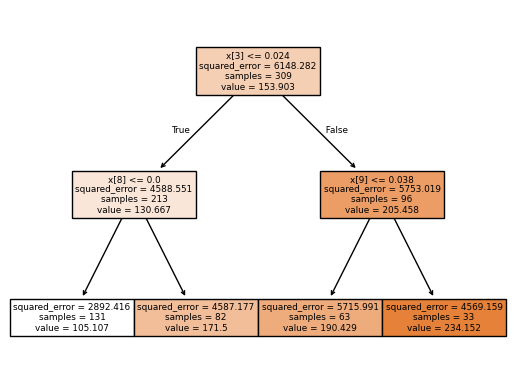

In [33]:
from sklearn import tree
tree.plot_tree(select_model,filled = True)